In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

I = np.linspace(-4,4,9)
I

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [3]:
X, Y = np.meshgrid(I,I)
X

array([[-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]])

In [4]:
Y

array([[-4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [5]:
np.sqrt(X**2 + Y**2)

array([[ 5.65685425,  5.        ,  4.47213595,  4.12310563,  4.        ,
         4.12310563,  4.47213595,  5.        ,  5.65685425],
       [ 5.        ,  4.24264069,  3.60555128,  3.16227766,  3.        ,
         3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.47213595,  3.60555128,  2.82842712,  2.23606798,  2.        ,
         2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 4.12310563,  3.16227766,  2.23606798,  1.41421356,  1.        ,
         1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 4.        ,  3.        ,  2.        ,  1.        ,  0.        ,
         1.        ,  2.        ,  3.        ,  4.        ],
       [ 4.12310563,  3.16227766,  2.23606798,  1.41421356,  1.        ,
         1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 4.47213595,  3.60555128,  2.82842712,  2.23606798,  2.        ,
         2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 5.        ,  4.24264069,  3.60555128,  3.16227766,  3

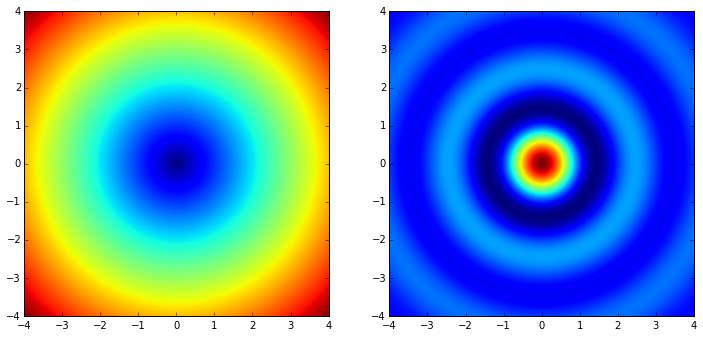

In [30]:
n=500
limit=4
I = np.linspace(-limit,limit,n)
Y, X = np.meshgrid(I,I)

D = np.sqrt(X**2 + Y**2)

S = np.sinc(D)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,12))

ax1.imshow(D, extent=[-limit,limit,-limit,limit])
ax2.imshow(S, extent=[-limit,limit,-limit,limit])

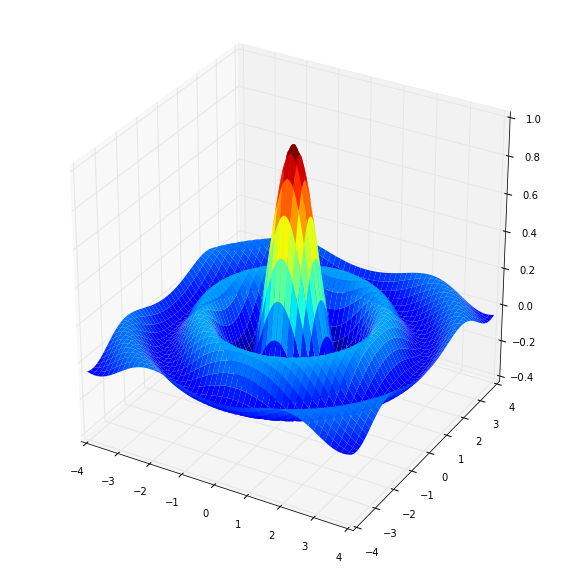

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, S, linewidth=0, cmap='jet')

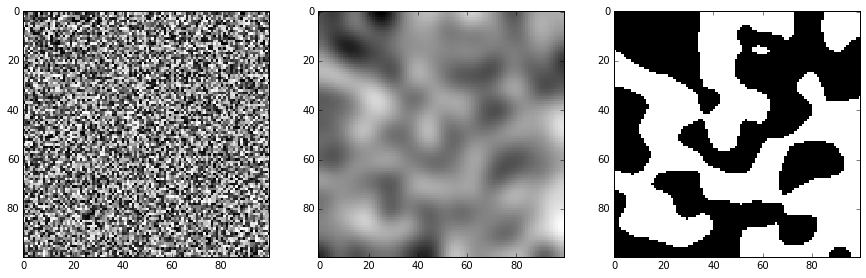

In [32]:
from scipy.ndimage.filters import gaussian_filter
from skimage.filter import threshold_otsu

n=100
noise = np.random.uniform(size=(n,n))
smoothed = gaussian_filter(noise,n/20)
thresholded = smoothed > threshold_otsu(smoothed)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,12))

ax1.imshow(noise, cmap='gray', interpolation='nearest')
ax2.imshow(smoothed, cmap='gray', interpolation='nearest')
ax3.imshow(thresholded, cmap='gray', interpolation='nearest')

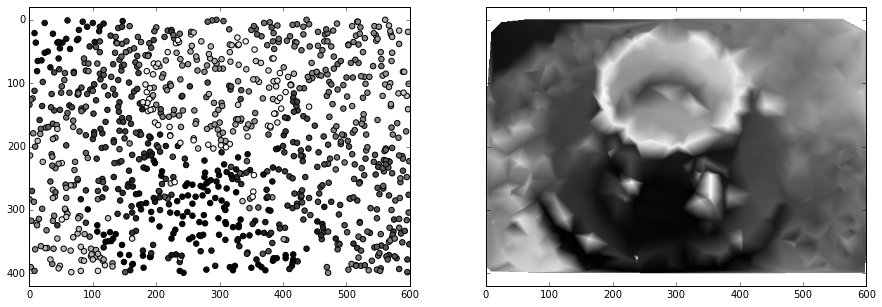

In [22]:
from skimage.data import coffee
from skimage.color import rgb2gray

from scipy.interpolate import griddata

y = rgb2gray(coffee())
h, w = y.shape

n_samples = 1024
sample_x = np.random.randint(h, size=n_samples)
sample_y = np.random.randint(w, size=n_samples)
sample_values = y[sample_x,sample_y]

sample_pts = np.vstack((sample_x, sample_y)).T
grid_x, grid_y = np.mgrid[:h,:w]

i = griddata(sample_pts, sample_values, (grid_x, grid_y), method='linear')

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5))

#ax1.imshow(y, cmap='gray')
ax1.scatter(sample_y, sample_x, c=sample_values, s=30, cmap='gray')
ax2.imshow(i, cmap='gray')